In [171]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Load the dataset
df = pd.read_excel('dataset/Hyperspectral/Combind_H_canopy.xlsx')

# Create the new category based on RWC
# df['RWC_category'] = df['RWC'].apply(lambda x: 0 if x > 65 else (1 if 62 < x <= 65 else 2))
df['RWC_category'] = df['RWC'].apply(lambda x: 0 if x > 59 else 1)
df['Treatment'] = df['Treatment'].apply(lambda x: 10 if x=="Well watered" else (20 if x=="Mild stress" else 30))
# Change all the columns to str
df = df.astype(str)

# Extract features and target variables
X = df.iloc[:, 3:-1].values
y = df['RWC_category'].values
original_counts = pd.Series(y).value_counts()
# Perform SMOTE resampling
smote = SMOTETomek(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to dataframe for comparison
X_resampled_df = pd.DataFrame(X_resampled, columns=df.columns[3:-1])
y_resampled_df = pd.DataFrame(y_resampled, columns=['RWC_category'])

# Concatenate the resampled features and target
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Show the value counts after resampling
resampled_counts = y_resampled_df['RWC_category'].value_counts()
print("Original counts:\n", original_counts)
print("Resampled counts:\n", resampled_counts)


Original counts:
 0    300
1     28
Name: count, dtype: int64
Resampled counts:
 RWC_category
0    300
1    300
Name: count, dtype: int64


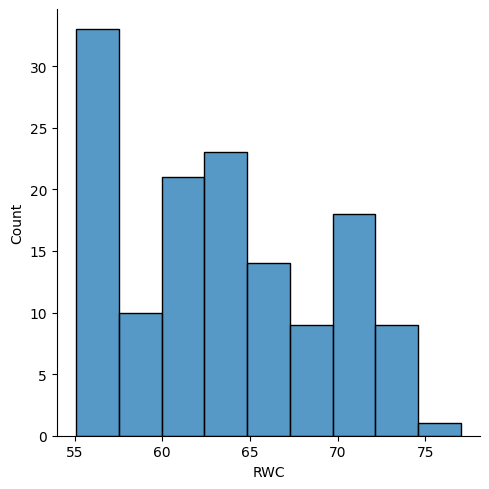

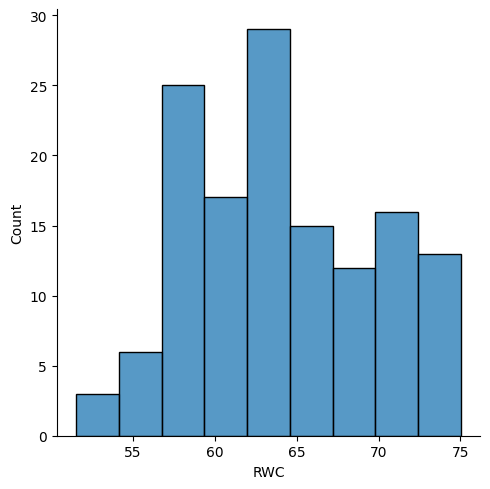

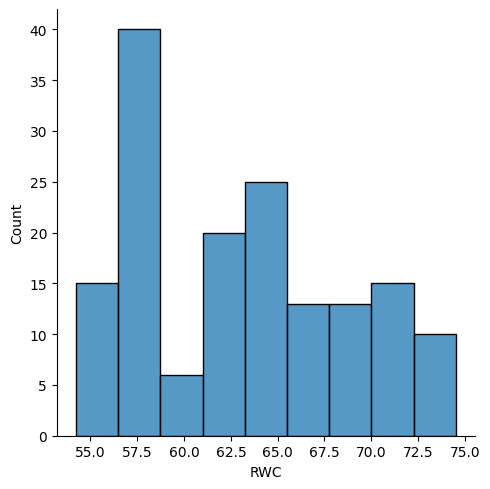

In [172]:

high_df= df_resampled[df_resampled['Treatment']==10]
low_df=df_resampled[df_resampled['Treatment']==20]
medium_df=df_resampled[df_resampled['Treatment']==30]


sns.displot(low_df["RWC"])
sns.displot(medium_df["RWC"])
sns.displot(high_df["RWC"])

<Axes: >

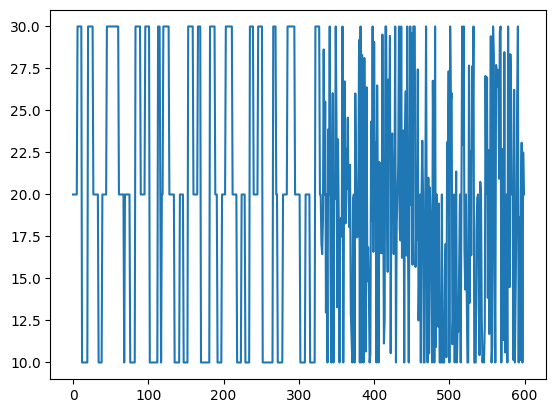

In [176]:
df_resampled["Treatment"].apply(lambda x: "Well watered" if 0<x<15 else ("Mild stress" if 18<x<23 else 30))